<a href="https://colab.research.google.com/github/MudrikaK/Project/blob/master/Dist_LogModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
dire = ('/content/gdrive/My Drive/Project/Data/driver_imgs_listn.csv')
print(dire)


/content/gdrive/My Drive/Project/Data/driver_imgs_listn.csv



# Distracted Driver Detection 

This Colab contain the multiclasses dataset along with the execution of KNN models.

In [ ]:

import pickle
import numpy as np 
import datetime
import pandas as pd
import cv2
import os
import time
import scipy
import random
import seaborn as sns 
import tensorflow as tf

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV
import tensorflow as tf
import matplotlib.image as mpimg

from tqdm import tqdm
from sklearn.datasets import load_files       
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.metrics import log_loss
from sklearn.preprocessing import OneHotEncoder

# Keras
from keras.preprocessing import image
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import one_hot
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from scipy import misc
from keras.models import load_model



from random import shuffle 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV


%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
directory = ('/content/gdrive/My Drive/Project/Images/Train')
test_directory = ('/content/gdrive/My Drive/Project/Images/Test')
random_test = ('/content/gdrive/My Drive/Project/Images/imgs')
classes = ["c0","c1","c2","c3","c4","c5","c6","c7","c8","c9","c10"]

In [ ]:
img_size1 = 240
img_size2 = 240

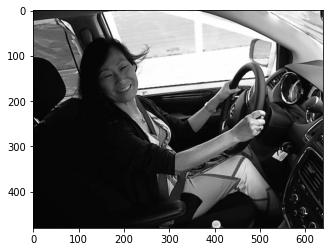

In [ ]:
#train class 
for i in classes:                 
    path = os.path.join(directory,i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

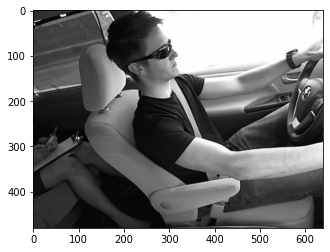

In [ ]:
test_array = []
for img in os.listdir(test_directory):
    img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
    test_array = img_array
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break

In [ ]:
print(img_array.shape)

(480, 640)


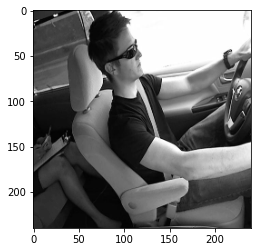

In [ ]:
new_img = cv2.resize(test_array,(img_size2,img_size1))
plt.imshow(new_img,cmap='gray')
plt.show()

In [ ]:
training_data = []
i = 0
def create_training_data():
    for category in classes:
        path = os.path.join(directory,category)
        class_num = classes.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img_array,(img_size2,img_size1))
            training_data.append([
                new_img,class_num])

In [ ]:
testing_data = []
i = 0
print(test_directory)
def create_testing_data():        
    for img in os.listdir(test_directory):
        img_array = cv2.imread(os.path.join(test_directory,img),cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img_array,(img_size2,img_size1))
        testing_data.append([img,
            new_img])       

/content/gdrive/My Drive/Project/Images/Test


In [ ]:
create_training_data()

In [ ]:
create_testing_data()

In [ ]:
print(len(training_data))
print(len(testing_data))

7545
996


In [ ]:
random.shuffle(training_data)

In [ ]:
x = []
y = []
for features, label in training_data:
    x.append(features)
    y.append(label)
    

In [ ]:
#X  = np.array(x[1]).reshape(-1,img_size2,img_size1,1)
#i = 1
#for i in range(len(x)):
X = np.array(x).reshape(-1,img_size2,img_size1,1)
#    X = np.append(X,Y,axis = 0)
X[0].shape
X.shape



(7545, 240, 240, 1)

In [ ]:
from pandas import DataFrame
df=DataFrame(y,columns=["class"])
print(df.shape)

(7545, 1)


# Logistic Regression Model.

In [ ]:
print(X.shape)
x1=X.shape[:-1]
x1

(7545, 240, 240, 1)


(7545, 240, 240)

In [ ]:
import numpy  
y1 = numpy.array(y) 
y1.shape

(7545,)

In [ ]:
number_of_train = X.shape[0]

In [ ]:
#new_img = X.reshape((X.shape[0]*X.shape[1]), X.shape[2])
X1 = X.reshape(number_of_train,X.shape[1]*X.shape[2])
X1.shape

(7545, 57600)

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.15, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(x1_train, y1_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict the response values for the observations in 

y_pred = logreg.predict(x1_test)
from sklearn import metrics
print(metrics.accuracy_score(y1_test, y_pred))

0.8701413427561837


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.8701413427561837


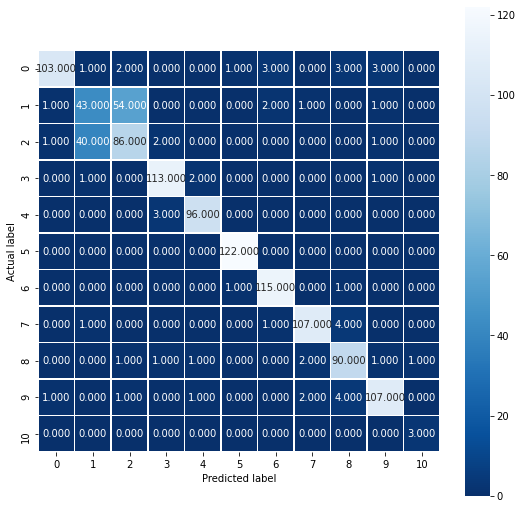

In [ ]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(x1_train, y1_train)
# predict the response values for the observations in 

y_pred = logreg.predict(x1_test)
from sklearn import metrics
print(metrics.accuracy_score(y1_test, y_pred))
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix # metrics error

cm = confusion_matrix(y1_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y1_test,y_pred))


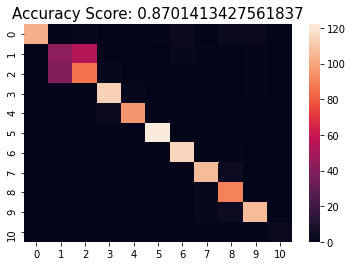

In [ ]:
plt.title(all_sample_title,size=15)
a=sns.heatmap(cm)

# Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()


In [ ]:
# Train Decision Tree Classifer
clf = clf.fit(x1_train,y1_train)

#Predict the response for test dataset
y_pred = clf.predict(x1_test)

print(metrics.accuracy_score(y1_test, y_pred))


0.6925795053003534


In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x1_train,y1_train)

#Predict the response for test dataset
y_pred = clf.predict(x1_test)

print(metrics.accuracy_score(y1_test, y_pred))


0.6819787985865724


0.691696113074205


Text(0.5, 1.0, 'Accuracy Score: 0.691696113074205')

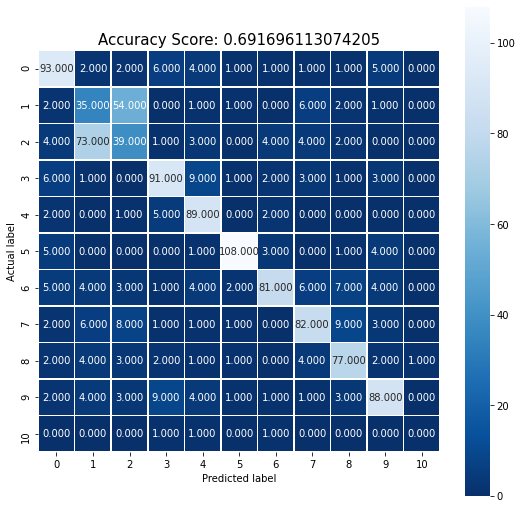

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x1_train,y1_train)

#Predict the response for test dataset
y_pred = clf.predict(x1_test)

print(metrics.accuracy_score(y1_test, y_pred))
#import seaborn as sns
#from sklearn.metrics import accuracy_score,confusion_matrix # metrics error

cm = confusion_matrix(y1_test,y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y1_test,y_pred))
plt.title(all_sample_title,size=15)
